## 용어
- 표준화잔차(standardized residual, studentized residual): 잔차를 표준오차로 나눈 값(회귀선으로 부터 떨어진 정도를 표준오차 개수로 표현한 값)
- 특잇값(outlier): 나머지 데이터(혹은 예측값)와 멀리 떨어진 레코드(혹은 출력값)
- 영향값(influential values): 있을 때와 없을 때 회귀방정식이 큰 차이를 보이는 값 혹은 레코드
- 지렛대, 레버리지(everage): 회귀식에 한 레코드가 미치는 영향력의 정도(유의어: 햇 값(hat value))
- 비정규 잔차(non-normal residual): 정규분포를 따르지 않는 잔차는 회귀분석의 요건을 무효로 만들 수 있다. 데이터 과학에서는 별로 중요하게 다루지 않는다.
- 이분산성(heteroskedasticity): 어떤 범위 내 출력값의 잔차가 매우 높은 분산을 보이는 경향(어떤 예측변수를 회귀식이 놓치고 있다는 것을 의미할 수 있다.)
- 편잔차그림(partial residual plot): 결과변수와 특정 예측변수 사이의 관계를 진단하는 그림(유의어: 추가변수 그림(added variable plot))

In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

In [69]:
# 한글 폰트 설정
plt.rc("font", family='Malgun Gothic')

# - 깨짐 설정
plt.rcParams['axes.unicode_minus'] = False

In [2]:
house = pd.read_csv('../../data/house_sales.csv', sep='\t')

## 회귀에서의 특이값(Outlier)
- 회귀에서의 특이값은 실제 y 값이 예측된 값에서 멀리 떨어져 있는 경우를 말한다. 표준화잔차를 조사해서 특이값을 발견할 수 있다.
- 특이값은 '부주의한' 데이터 입력 또는 단위 실수 같은 문제들 때문에 발생할 수 있다.
- 빅데이터의 경우, 새로운 데이터를 예측하기 위한 회귀분석에서 특이값이 그렇게 문제가 되지 않는다. 그러나 특이값을 찾는 것이 주목적인 특이값 검출의 경우 이값들이 매우 중요해진다. 또한 특이값은 사기 사건이나 갑작스러운 사건 발생과도 관련이 있다.

In [9]:
# 우편번호가 98105인 데이터만 가지고 회귀
house_98105 = house.loc[house['ZipCode'] == 98105, :]

features = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
label = 'AdjSalePrice'

house_outlier = sm.OLS(house_98105[label], house_98105[features].assign(const=1))
result_98105 = house_outlier.fit()
result_98105.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     238.7
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          1.69e-103
Time:                        11:55:21   Log-Likelihood:                -4226.0
No. Observations:                 313   AIC:                             8464.
Df Residuals:                     307   BIC:                             8486.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   209.6023     24.408      8.587      0.000     161.574     257.631
SqFtLot          38.9333      5.330      7.305      0.000      28.445      49.421
Bathrooms      2282.2641      2e+04      0.114      0.909    -3.7e+04    4.16e+04
Bedrooms      -2.632e+04   1.29e+04     -2.043      0.042   -5.17e+04    -973.867
BldgGrade        1.3e+05   1.52e+04      8.533      0.000       1e+05     1.6e+05
const         -7.725e+05   9.83e+04     -7.861      0.000   -9.66e+05   -5.79e+05
==============================================================================
Omnibus:                       82.127   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              586.561
Skew:                           0.859   Prob(JB):                    4.26e-128
Kurtosis:                       9.483   Cond. No.                     5.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# 잔차
print(result_98105.resid)

# 잔차 최소값, 최대값
print(f"\n잔차 최소값: {result_98105.resid.min()}")
print(f"잔차 최대값: {result_98105.resid.max()}")

1036    -456062.232432
1769    -158145.203415
1770     -62978.327751
1771    -186794.017568
1783     -99686.534518
             ...      
26628     15171.804483
26629    -96919.956869
26630    -62899.873474
26631     -8661.168054
26632   -261156.728401
Length: 313, dtype: float64

잔차 최소값: -757753.6192115835
잔차 최대값: 953910.5988086322


In [42]:
# 표준화잔차
influence = OLSInfluence(result_98105)
sresiduals = influence.resid_studentized_internal

print(f"표준오차: {result_98105.resid.std()}\n")

print(f"표준화잔차 최소값:{sresiduals.min()}, 인덱스: {sresiduals.idxmin()}") # 표준오차의 4배 만큼 회귀식과 차이를 보임
print(f"표준화잔차 최대값:{sresiduals.max()}, 인덱스: {sresiduals.idxmax()}") # 표준오차의 5배 만큼 회귀식과 차이를 보임

표준오차: 177058.37685818496

표준화잔차 최소값:-4.326731804078567, 인덱스: 24333
표준화잔차 최대값:5.408104585689673, 인덱스: 14392


In [45]:
# 표준화잔차 최소값의 레코드
outlier = house_98105.loc[sresiduals.idxmin(), :]
print('AdjSalePrice', outlier[label])
print(outlier[features])

AdjSalePrice 119748.0
SqFtTotLiving    2900
SqFtLot          7276
Bathrooms         3.0
Bedrooms            6
BldgGrade           7
Name: 24333, dtype: object


## 영향값(Infilential values)
- 회귀모형에서 제외됐을 때 모델에 중요한 변화를 가져오는 값(레코드)을 주영항관측값(influential observation)이라고 한다.
- 회귀분석에서, 잔차가 크다고 해서 모두 이런 값이 되는 것은 아니다.
- 회귀모형을 구하는 목적이 새로 들어오는 값(레코드)에 대해 믿을 만한 예측값을 얻기 위함이라면, 데이터의 크기가 작을 경우에만 영향력이 큰 관측 데이터를 확인하는 작업이 유용하다. 데이터 수가 클 경우, 어떤 한 값이 회귀방정식에 엄청난 변화를 가져오기란 쉽지 않다(회귀 결과 여전히 특이값들이 존재한다 하더라도). 물론 이상 검출이 목적이라면 영향력이 높은 값들을 찾는 것이 큰 도움이 된다.

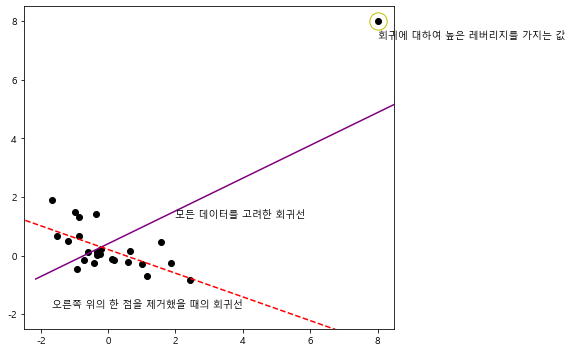

In [130]:
from scipy.stats import linregress

np.random.seed(5)
x = np.random.normal(size=25)
y = -x / 5 + np.random.normal(size=25)
x[0] = 8
y[0] = 8

def abline(slope, intercept, ax):
    """Calculate coordinates of a line based on slope and intercept"""
    x_vals = np.array(ax.get_xlim())
    return (x_vals, intercept + slope * x_vals)

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x.max(), y.max(), color='y', s=300, facecolor='white')
ax.scatter(x, y, color='black')
ax.text(x.max(), y.max()-0.3, s='회귀에 대하여 높은 레버리지를 가지는 값', va='top', ha='left')
slope, intercept, _, _, _ = linregress(x, y)
ax.plot(*abline(slope, intercept, ax), color='purple')
ax.text(2, 1.58, s='모든 데이터를 고려한 회귀선', va='top', ha='left')
slope, intercept, _, _, _ = linregress(x[1:], y[1:])
ax.plot(*abline(slope, intercept, ax), color='red', linestyle='--')
ax.text(4, -1.5, s='오른쪽 위의 한 점을 제거했을 때의 회귀선', va='top', ha='right')
ax.set_xlim(-2.5, 8.5)
ax.set_ylim(-2.5, 8.5)

fig.tight_layout()
plt.show()

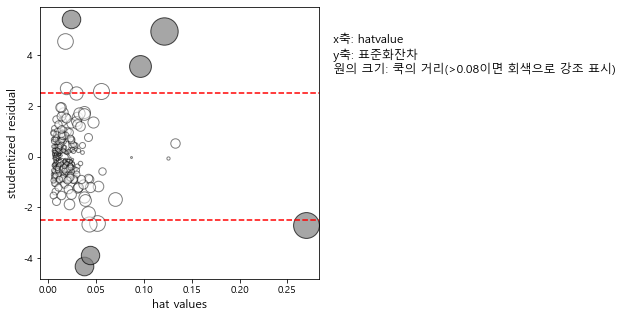

In [199]:
# 햇값(hat value): 레버리지를 측정하는 일반적인 척도, 2(P+1)/n 이상의 값들은 레버리지가 높은 데이터 값을 나타냄
# 쿡의거리(Cook's distance): 레버리지와 잔차의 크기를 합쳐서 영향력을 판단, 4/(n-P-1)보다 크면 영향력이 높다고 봄
# 영향력그림(influence plot), 거품그림(bubble plot): 표준화잔차, 햇값, 쿡의 거리를 모두 한 그림에 표현
# P: 사용된 변수의 수, n:데이터 개수

influence = OLSInfluence(result_98105)

fig, ax = plt.subplots(figsize=(5, 5))
ax.axhline(-2.5, linestyle='--', color='red')
ax.axhline(2.5, linestyle='--', color='red')
for iloc_idx in range(len(house_98105)):
    hat_value = influence.hat_matrix_diag[iloc_idx]
    st_residual = influence.resid_studentized_internal.iloc[iloc_idx]
    cooks_distance = influence.cooks_distance[0].iloc[iloc_idx]
    if cooks_distance > 0.08:
        ax.scatter(hat_value, st_residual,
                  s=1000*np.sqrt(cooks_distance),
                  facecolor='gray', edgecolor='black', alpha=0.7)
    else:
        ax.scatter(hat_value, st_residual,
                  s=1000*np.sqrt(cooks_distance),
                  facecolor='white', edgecolor='black', alpha=0.5)
        pass
ax.set_xlabel('hat values', fontsize=12)
ax.set_ylabel('studentized residual', fontsize=12)
xlim = ax.get_xlim()
ax.text(xlim[1]+0.01, 4, s=' x축: hatvalue\n y축: 표준화잔차\n 원의 크기: 쿡의 거리(>0.08이면 회색으로 강조 표시)',
        va='center', ha='left', fontsize=12)


plt.show()

In [205]:
# 전체 레코드를 사용한것과, 영향값이 큰 레코드들을 제거한 것의 회귀 계수 비교
mask = [dist < 0.08 for dist in influence.cooks_distance[0]]
house_infl = house_98105.loc[mask] # 쿡의 거리가 0.08보다 큰 레코드 제거(위에서 회색으로 된 6개)

ols_infl = sm.OLS(house_infl[label], house_infl[features].assign(const=1))
result_infl = ols_infl.fit()

pd.DataFrame({
    'Original': result_98105.params,
    'Influential removed': result_infl.params,
})

# Bathrooms의 계수가 크게 변하는 것을 볼 수 있다.

,Original,Influential removed
SqFtTotLiving,209.602346,230.052569
SqFtLot,38.933315,33.141600
Bathrooms,2282.264145,-16131.879785
Bedrooms,-26320.268796,-22887.865318
BldgGrade,130000.099737,114870.559737
const,-772549.862447,-647137.096716


## 이분산성(Heteroskedasticity), 비정규성(Non-Normality), 오차 간 상관(Correlated Errors)
- 보통 최소제곱추정은 다양한 분포 가정하에서 편향성도 없고 경우에 따라 '최적'이라고 할 수 있는 추정을 제공한다. 즉, 대부분의 문제에서 데이터 과학자라면 잔차 분포에 너무 많은 신경을 쓸 필요는 없다.
- 데이터 과학자가 신경 쓰는 것 한 가지는, 잔차에 대한 가정을 기반으로 신뢰구간을 구하는 계산하는 방법이다.